In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [ ]:
# cat_features = df.select_dtypes(include='object').columns
# num_features = df.select_dtypes(exclude='object').columns

# cat_features = [col for col in df.columns if df[col].dtypes == 'O']
# num_features = [col for col in df.columns if df[col].dtypes != 'O']

# categorical_variables = list(df.columns[df.dtypes == 'object'])
# numerical_variables = list(df.columns[df.dtypes != 'object'])

In [5]:
categorical_variables= list(df.columns[df.dtypes == "O"])
numerical_variables= list(df.columns[df.dtypes != "O"])

categorical_variables, numerical_variables

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['math_score', 'reading_score', 'writing_score'])

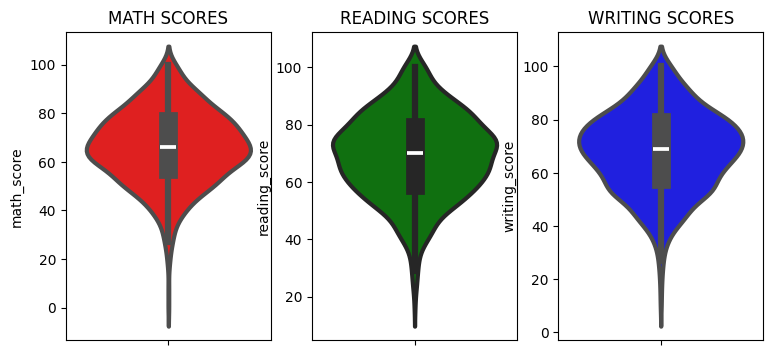

In [3]:
plt.figure(figsize=(9,4))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [6]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [7]:
#gender_group = df.groupby('gender')[['math_score','reading_score','writing_score','total_score','average']].mean().reset_index()
gender_group = df.groupby('gender')[[col for col in df.columns if df[col].dtypes != 'O']].mean().reset_index()
gender_group

,gender,math_score,reading_score,writing_score,total_score,average
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.837483


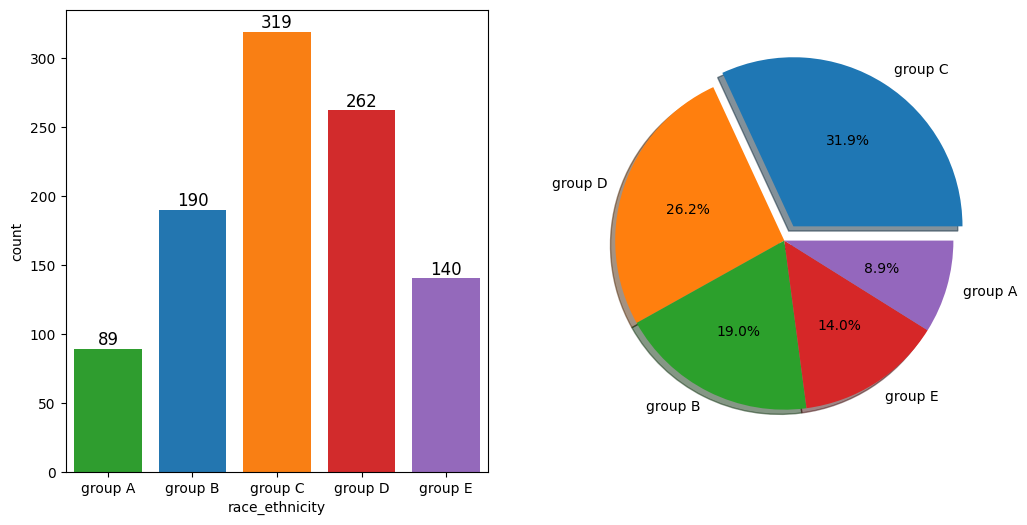

In [15]:
race_order= ['group A', 'group B', 'group C', 'group D', 'group E']

f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['race_ethnicity'], order= race_order, hue='race_ethnicity',data=df, ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x = df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],
        autopct='%1.1f%%',
        shadow=True)
plt.show()   

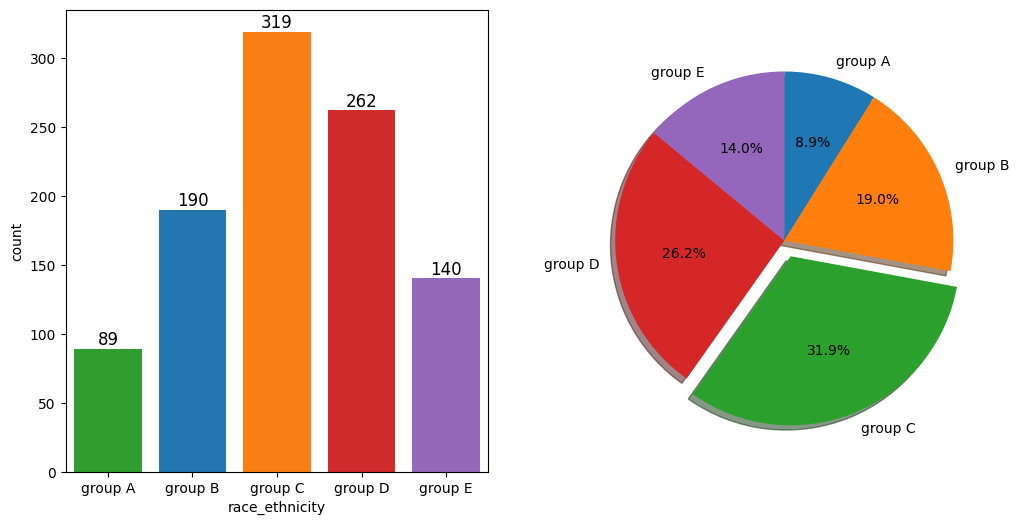

In [16]:
race_order= ['group A', 'group B', 'group C', 'group D', 'group E']
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['race_ethnicity'], order= race_order, hue='race_ethnicity',data=df, ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)

race_count= df['race_ethnicity'].value_counts().reindex(race_order, fill_value= 0)    
plt.pie(x = race_count,
        labels=race_count.index,
        explode=[0,0,0.1,0,0],
        autopct='%1.1f%%',
        shadow=True,
        startangle= 90,
        counterclock= False)
plt.show()   

### Bivariate Analysis 
- (Does parental education have any impact on student's performance?)

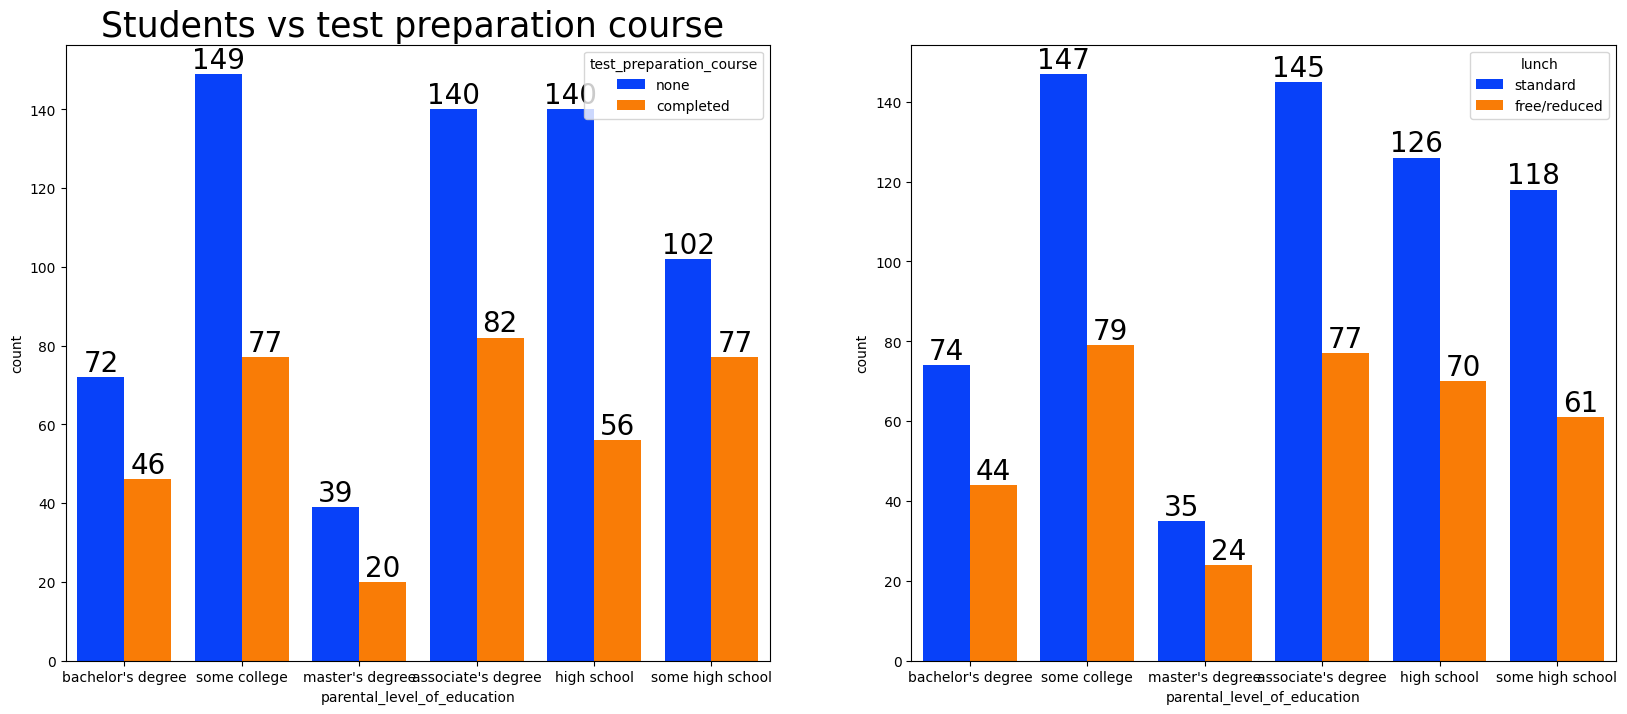

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

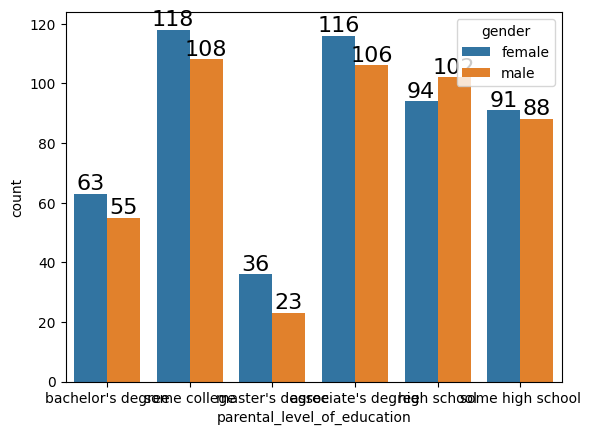

In [ ]:
sns_count = sns.countplot(data = df, x= df['parental_level_of_education'], hue= 'gender')
for container in sns_count.containers:
    plt.bar_label(container, fontsize= 16)
plt.show()

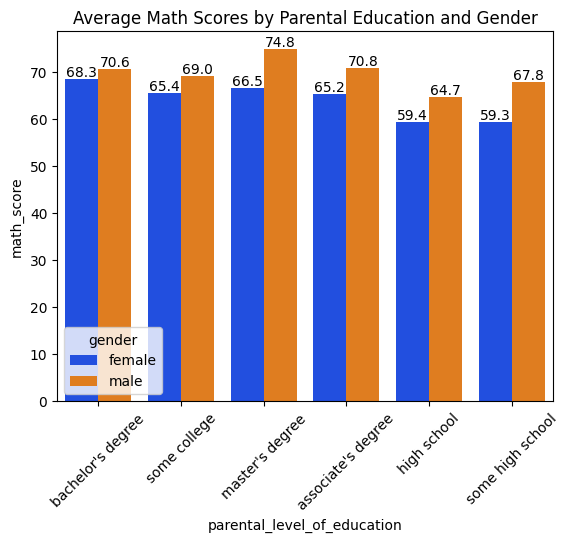

In [ ]:
ax = sns.barplot(x=df['parental_level_of_education'], 
                 y=df['math_score'], 
                 hue=df['gender'], 
                 palette='bright',
                 errorbar= None)
plt.title('Average Math Scores by Parental Education and Gender')
plt.xticks(rotation= 45)
for container in ax.containers:
    plt.bar_label(container, fmt= '%.1f')
plt.show()

### Univariate Analysis (Race & Ethnicity)

### BIVARIATE ANALYSIS 
- (Does Race or Ehnicity has any impact on student's performance?)

In [ ]:
race_score = df.groupby('race_ethnicity')[df.columns[df.dtypes!= 'O']].mean().reset_index()
race_score

,race_ethnicity,math_score,reading_score,writing_score,total_score,average
0,group A,61.629213,64.674157,62.674157,188.977528,62.992509
1,group B,63.452632,67.352632,65.600000,196.405263,65.468421
2,group C,64.463950,69.103448,67.827586,201.394984,67.131661
3,group D,67.362595,70.030534,70.145038,207.538168,69.179389
4,group E,73.821429,73.028571,71.407143,218.257143,72.752381


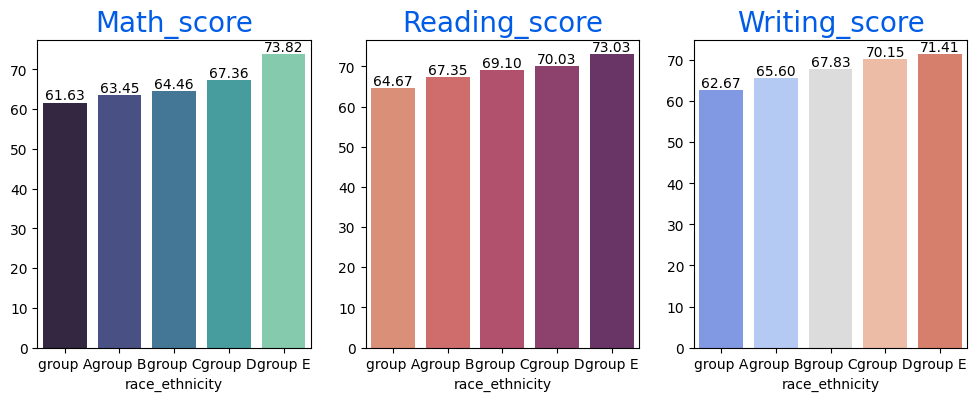

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(12,4))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, hue= Group_data2['math_score'].mean().index, palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10, fmt = '%.2f')

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values, hue = Group_data2['reading_score'].mean().index, palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10, fmt = '%.2f')

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values, hue = Group_data2['writing_score'].mean().index,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10, fmt = '%.2f')

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

# Model Training

In [ ]:
X = df.drop(columns = ['math_score'])
y = df['math_score']
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [ ]:
cat_features = list(X.columns[X.dtypes == 'O'])
num_features = list(X.columns[X.dtypes != 'O'])

print(cat_features)
print(num_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
['reading_score', 'writing_score']


In [ ]:
transformers = [
    ('scaler', StandardScaler(), num_features),
    ('onehot', OneHotEncoder(), cat_features)
]

preprocessor = ColumnTransformer(transformers)

X = preprocessor.fit_transform(X)

X.shape

(1000, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [ ]:
# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('StandardScaler', numeric_transformer, num_features),
#         ('OneHotEncoder', oh_transformer, cat_features)
#     ]
# )

# X = preprocessor.fit_transform(X)
# X.shape

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}
results = []

for name, regressor in models.items():
    print(f"Training {name}...")

    grid = GridSearchCV(
        estimator= regressor,
        param_grid = model_params[name],
        cv = 5,
        n_jobs = -1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_param = grid.best_params_

    mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, best_model.predict(X_train))
    mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, best_model.predict(X_test))

    results.append({
        'Model': name,
        'Best Params': best_param,
        'Mean Abs Error (train)': mae_train,
        'Mean Abs Error (test)': mae_test,
        'Mean Squared Error (train)': mse_train,
        'Mean Squared Error (test)': mse_test,
        'Root Mean Squared Error (train)': rmse_train,
        'Root Mean Squared Error (test)': rmse_test,
        'R2 Score (train)': r2_train,
        'R2 Score (test)': r2_test
    })

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree Regressor...
Training KNeighbors Regressor...
Training Random Forest Regressor...
Training AdaBoost Regressor...
Training Support Vector Regressor...
Training CatBoost Regressor...
Training XGB Regressor...


In [ ]:
results_df = pd.DataFrame(results).sort_values(by= 'R2 Score (test)', ascending= False)
results_df

,Model,Best Params,Mean Abs Error (train),Mean Abs Error (test),Mean Squared Error (train),Mean Squared Error (test),Root Mean Squared Error (train),Root Mean Squared Error (test),R2 Score (train),R2 Score (test)
2,Lasso Regression,{'alpha': 0.1},4.334891,4.154561,29.143716,28.821024,5.398492,5.368522,0.870729,0.881560
1,Ridge Regression,{'alpha': 0.9},4.265135,4.211394,28.337248,29.059700,5.323274,5.390705,0.874307,0.880579
0,Linear Regression,{},4.266712,4.214763,28.334870,29.095170,5.323051,5.393994,0.874317,0.880433
8,CatBoost Regressor,{'depth': 3},3.508838,4.345087,19.179769,30.615650,4.379471,5.533141,0.914926,0.874185
5,Random Forest Regressor,{'max_depth': 7},3.385143,4.512418,17.457833,33.867873,4.178257,5.819611,0.922564,0.860820
9,XGB Regressor,{'learning_rate': 0.1},2.046711,4.710447,7.193333,37.412216,2.682039,6.116553,0.968093,0.846254
6,AdaBoost Regressor,{'learning_rate': 1.0},4.702199,4.780224,33.274014,38.067338,5.768363,6.169873,0.852409,0.843562
3,Decision Tree Regressor,{'max_depth': 5},4.639612,4.931523,32.687389,42.771610,5.717289,6.540001,0.855011,0.824230
4,KNeighbors Regressor,{'n_neighbors': 10},4.835000,5.506000,36.602375,50.652200,6.049990,7.117036,0.837646,0.791845
7,Support Vector Regressor,{'C': 1.0},4.869189,5.401539,43.257024,66.042005,6.577007,8.126623,0.808128,0.728600


In [ ]:
model = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_mae = float('inf')

for model_name, model in model.items():
    params = model_params.get(model_name, {})
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R2 Score: {r2}")
    print()

    if mae < best_mae:
        best_mae = mae
        best_model = model_name

print(f"Best Model: {best_model}")
print(f"Best MAE: {best_mae}")


y_pred = best_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

print(f"Best Model: {best_model}")  
print(f"Best MAE: {mae}")
print(f"Best MSE: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best R2 Score: {r2}")

print("Best Model has been saved to 'best_model.joblib'")



In [ ]:
model = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'XGB Regressor': XGBRegressor()
}

model_params = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Lasso Regression': {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Decision Tree Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'KNeighbors Regressor': {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'Random Forest Regressor': {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'AdaBoost Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'Support Vector Regressor': {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
    'CatBoost Regressor': {'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
    'XGB Regressor': {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
}


# Store the results
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Loop over all models
for name, reg in model.items():
    print(f"Training {name}...")

    # Create GridSearchCV
    grid = GridSearchCV(estimator=reg,
                        param_grid=model_params[name],
                        cv=5,
                        scoring='r2',
                        n_jobs=-1)
    
    # Fit the model
    grid.fit(X_train, y_train)

    # Best model and R² on training data
    best_model = grid.best_estimator_
    y_pred = grid.best_estimator_.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

    # Save the result
    results.append({
        'Model': name,
        'Best Params (test)': grid.best_params_,
        'Mean Abs Error (test)': mae,
        'Mean Squared Error (test)': mse,
        'Root Mean Squared Error (test)': rmse,
        'R2 Score (test)': r2

    })

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).sort_values(by='R2 Score (test)', ascending=False)
print(results_df)


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree Regressor...
Training KNeighbors Regressor...
Training Random Forest Regressor...
Training AdaBoost Regressor...
Training Support Vector Regressor...
Training CatBoost Regressor...
Training XGB Regressor...
                      Model      Best Params (test)  Mean Abs Error (test)  \
0         Linear Regression                      {}               4.227591   
1          Ridge Regression          {'alpha': 1.0}               4.226224   
2          Lasso Regression          {'alpha': 0.1}               4.226376   
8        CatBoost Regressor            {'depth': 2}               4.211778   
5   Random Forest Regressor        {'max_depth': 7}               4.429356   
9             XGB Regressor  {'learning_rate': 0.1}               4.580212   
6        AdaBoost Regressor  {'learning_rate': 0.9}               4.991439   
4      KNeighbors Regressor      {'n_neighbors': 8}       

### Multiple Model GridSearchCV

#### Dependent and Independent Variables

In [ ]:
X = df.drop(columns = ['math_score'])
y = df['math_score']

#### Categorical and Numerical Variables List

In [ ]:
cat_features = [col for col in X.columns if X[col].dtypes == 'O']
num_features = [col for col in X.columns if X[col].dtypes != 'O']

#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

#### Column Transformer

In [ ]:
transformers = [
    ('Scaler', StandardScaler(), num_features),
    ('Onehot', OneHotEncoder(), cat_features)
]

preprocessor = ColumnTransformer(transformers)

#### Pipeline

In [ ]:
Input = [
    ('Preprocessor/Column_transformer', preprocessor),
    ('clf', LinearRegression()) #placeholder
]

pipe = Pipeline(Input)

#### GridSearchCV

In [ ]:
param_grid=[
    {
        'clf': [LinearRegression()]
    },
    {
        'clf': [Ridge()],
        'clf__alpha': list(np.logspace(-1, 1, 3, endpoint= True))
    },
    {
        'clf': [Lasso()],
        'clf__alpha': list(np.logspace(-1, 1, 3, endpoint= True))
    },
    {
        'clf': [DecisionTreeRegressor()],
        'clf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    {
        'clf': [KNeighborsRegressor()],
        'clf__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__weights': ['uniform', 'distance']
    },
    {
        'clf': [RandomForestRegressor()],
        'clf__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__max_depth': [None, 5, 10]
    },
    {
        'clf': [AdaBoostRegressor()],
        'clf__n_estimators': [50, 100],
        'clf__learning_rate': [0.01, 0.1, 1.0]
    },
    {
        'clf': [SVR()],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__epsilon': [0.1, 0.2]
    },
    {
        'clf': [CatBoostRegressor(verbose=0)],
        'clf__depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.1],
        'clf__iterations': [100, 200]
    },
    {
        'clf': [XGBRegressor()],
        'clf__max_depth': [3, 5],
        'clf__learning_rate': [0.01, 0.1],
        'clf__n_estimators': [100, 200]
    }

]


grid = GridSearchCV(
    estimator= pipe,
    param_grid= param_grid,
    cv = 5,
    n_jobs= -1,
    scoring= 'r2'
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor/Column_transformer',
                                        ColumnTransformer(transformers=[('Scaler',
                                                                         StandardScaler(),
                                                                         ['reading_score',
                                                                          'writing_score']),
                                                                        ('Onehot',
                                                                         OneHotEncoder(),
                                                                         ['gender',
                                                                          'race_ethnicity',
                                                                          'parental_level_of_education',
                                                                          'lunch',
                                                                          'test_preparation_course'])])),
                                       ('clf',
                                        DecisionTreeRegressor(max_depth=5))]),
             n_jobs=-1,...
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None, ...)],
                          'clf__learning_rate': [0.01, 0.1],
                          'clf__max_depth': [3, 5],
                          'clf__n_estimators': [100, 200]}],
             scoring='r2')

In [ ]:
results_df = pd.DataFrame(grid.cv_results_).sort_values(by= 'rank_test_score')
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__alpha,param_clf__max_depth,param_clf__n_neighbors,param_clf__weights,param_clf__n_estimators,...,param_clf__iterations,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.054411,0.006934,0.028471,0.007268,Ridge(),1.0,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 1.0}",0.872779,0.874222,0.854630,0.855774,0.885630,0.868607,0.011822,1
1,0.061032,0.026698,0.034519,0.019517,Ridge(),0.1,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 0.1}",0.872909,0.874017,0.854628,0.855895,0.885513,0.868592,0.011752,2
0,0.052422,0.016234,0.022704,0.007740,LinearRegression(),NaN,NaN,NaN,NaN,NaN,...,NaN,{'clf': LinearRegression()},0.872922,0.873991,0.854626,0.855907,0.885497,0.868589,0.011744,3
3,0.044493,0.024226,0.040354,0.042637,Ridge(),10.0,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Ridge(), 'clf__alpha': 10.0}",0.870834,0.874892,0.853618,0.853795,0.885258,0.867679,0.012341,4
4,0.082546,0.039131,0.029595,0.016653,Lasso(),0.1,NaN,NaN,NaN,NaN,...,NaN,"{'clf': Lasso(), 'clf__alpha': 0.1}",0.868528,0.875504,0.854242,0.851559,0.883295,0.866626,0.012171,5


In [ ]:
best_model = grid.best_estimator_
best_param = grid.best_params_
y_pred = best_model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
#print(f"Best Model: {best_model}")
print(f"Best Parameter: {best_param}")
print(f"Best MAE: {mae}")
print(f"Best MSE: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best R2 Score: {r2*100:.2f}")

Best Parameter: {'clf': Ridge(), 'clf__alpha': 1.0}
Best MAE: 4.211112826071162
Best MSE: 29.05660162669478
Best RMSE: 5.390417574427308
Best R2 Score: 88.06


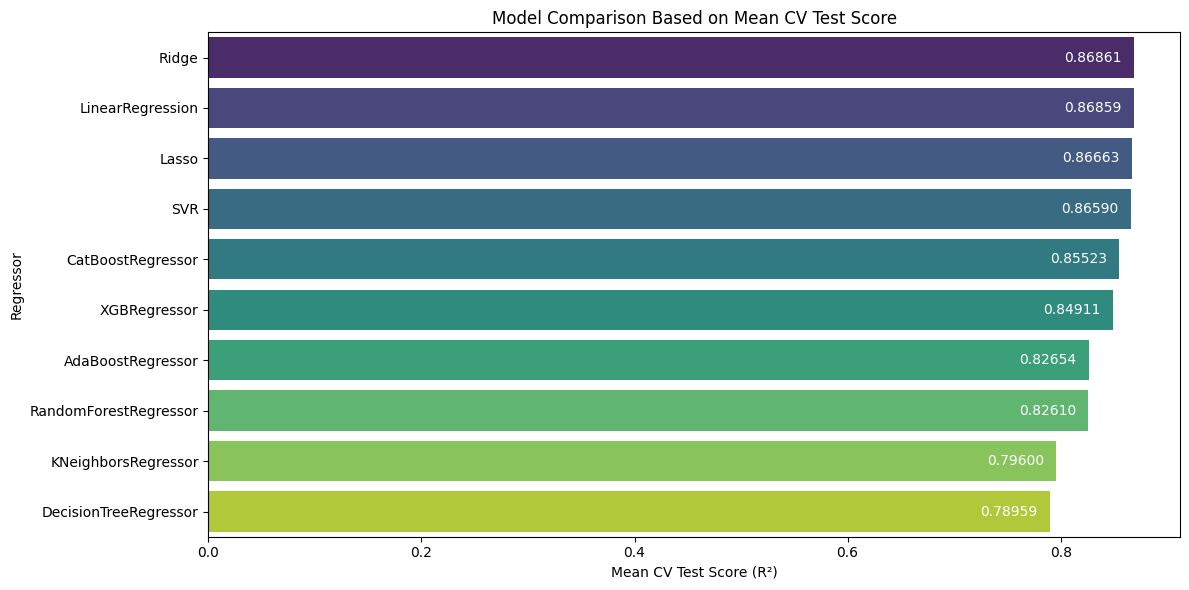

In [ ]:
# Add model names to results
results_df['model_name'] = results_df['param_clf'].apply(lambda x: type(x).__name__)

# Group by model and get the best score per model
model_scores = results_df.groupby('model_name')['mean_test_score'].max().reset_index()
model_scores = model_scores.sort_values(by='mean_test_score', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=model_scores, x='mean_test_score', y='model_name', hue= 'model_name',palette= 'viridis')

plt.xlabel('Mean CV Test Score (R²)')
plt.ylabel('Regressor')
plt.title('Model Comparison Based on Mean CV Test Score')
plt.grid(False)
plt.tight_layout()

for container in bar_plot.containers:
    plt.bar_label(container, fmt = "%.5f", padding= -50, color = 'white')

plt.show()


In [ ]:
type(results_df['param_clf'][1]).__name__

'Ridge'

# Rough Meta Data / Input Schema

In [ ]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [ ]:
target_col_name= "math_score"
X= df.drop(columns=target_col_name)
y= df[target_col_name]

In [ ]:
cat_columns= [col for col in X.columns if X[col].dtypes=="O"]
num_columns= [col for col in X.columns if X[col].dtypes!="O"]
cat_columns, num_columns

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['reading_score', 'writing_score'])

In [ ]:
categories= {col: sorted(df[col].unique().tolist()) for col in cat_columns}
categories

{'gender': ['female', 'male'],
 'race_ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'],
 'parental_level_of_education': ["associate's degree",
  "bachelor's degree",
  'high school',
  "master's degree",
  'some college',
  'some high school'],
 'lunch': ['free/reduced', 'standard'],
 'test_preparation_course': ['completed', 'none']}

In [ ]:
input_schema={
    'cat_columns': categories,
    'num_columns': num_columns
}
input_schema

{'cat_columns': {'gender': ['female', 'male'],
  'race_ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'],
  'parental_level_of_education': ["associate's degree",
   "bachelor's degree",
   'high school',
   "master's degree",
   'some college',
   'some high school'],
  'lunch': ['free/reduced', 'standard'],
  'test_preparation_course': ['completed', 'none']},
 'num_columns': ['reading_score', 'writing_score']}

In [ ]:
for k, v in input_schema['cat_columns'].items():
    print(k)
    print(v)
    print('-'*20)


gender
['female', 'male']
--------------------
race_ethnicity
['group A', 'group B', 'group C', 'group D', 'group E']
--------------------
parental_level_of_education
["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school']
--------------------
lunch
['free/reduced', 'standard']
--------------------
test_preparation_course
['completed', 'none']
--------------------


🧪